In [2]:
import bempp.api
from bempp.api.assembly.blocked_operator import BlockedOperator
import math
import numpy as np
import scipy 
import cmath
from numba import objmode
from numpy.linalg import slogdet
from bempp.api.operators.far_field import helmholtz as helmholtz_farfield
import matplotlib.pyplot as plt
import bempp.api.shapes.fractals

In [3]:
h = 0.05
dist = 0.5

sphere1 = bempp.api.shapes.sphere(h=h, origin=((dist/2) + 1, 0, 0))
sphere2 = bempp.api.shapes.sphere(h=h, origin=(-((dist/2) + 1), 0, 0))

space_sphere1 = bempp.api.function_space(sphere1, "P", 1)
space_sphere2 = bempp.api.function_space(sphere2, "P", 1)

for N_wn in [70]:

    for ubound_wn in [25]:
        lbound_wn = 0
        quad_points = np.linspace(np.exp(-ubound_wn), np.exp(-lbound_wn), N_wn)
        results = []
        for index2, point2 in enumerate(quad_points):

            wavenumber = -1j * np.log(point2)

            slp11 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere1, space_sphere1, wavenumber)
            slp12 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere1, space_sphere1, wavenumber)
            slp21 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere2 , space_sphere2 , wavenumber)
            slp22 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere2 , space_sphere2 , wavenumber)

            mat11 = slp11.weak_form().A
            mat12 = slp12.weak_form().A
            mat21 = slp21.weak_form().A
            mat22 = slp22.weak_form().A
            mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
            mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

            mat = np.block([[mat11,mat12],[mat21,mat22]])  
            mat11_inv = scipy.linalg.lu_solve(scipy.linalg.lu_factor(mat11), np.eye(mat11.shape[0]))
            mat22_inv = scipy.linalg.lu_solve(scipy.linalg.lu_factor(mat22), np.eye(mat22.shape[0]))

            inv_free_mat2 = np.block([[mat11_inv,  mat12_zero],
                                  [mat21_zero, mat22_inv]])  

            combined_inverse_free = inv_free_mat2.dot(mat)
            sign, logdet = slogdet(combined_inverse_free)

            results.append(logdet)
        print(N_wn, np.trapz(-np.array(results) / quad_points, quad_points) / (2 * np.pi))

70 0.044222988057969315


In [ ]:
Z = 3.0
ub = 4, 5, 10
h = 0.1


h = 0.05

Z = 1.5
ub = 8, 9, 10
h = 0.1


h = 0.05

Z = 0.5
ub = 25
h = 0.1

20 0.043786492319013035
30 0.043809876777666575
40 0.04382059915645993
50 0.04382662875780533
60 0.04383044357362744
70 0.043833050800340626

CasE_05_01 = [0.043786492319013035, 0.043809876777666575, 0.04382059915645993, 0.04382662875780533, 0.04383044357362744, 0.043833050800340626]
CasE_05_005 = [0.044305867203324606, 0.044267365994235475]

h = 0.05

20 0.044305867203324606
30 0.044267365994235475

In [3]:
CasE_05 = [0.044142920889365764, 0.04378745428754526, 0.043307825800813826, 0.0425274735585427] 
CasE_15 = [0.004684510596741076, 0.004668668075048978, 0.0046463126764854845, 0.004608327156406329] 
CasE_30 = [0.001029159937793544, 0.0010266636526601919, 0.0010231501929812861, 0.0010171903056843653]

In [7]:
Rel_err_05 = [abs(CasE_05[0] - CasE_05[1])/CasE_05[0], abs(CasE_05[0] - CasE_05[2])/CasE_05[0], abs(CasE_05[0] - CasE_05[3])/CasE_05[0]]
Rel_err_15 = [abs(CasE_15[0] - CasE_15[1])/CasE_15[0], abs(CasE_15[0] - CasE_15[2])/CasE_15[0], abs(CasE_15[0] - CasE_15[3])/CasE_15[0]]
Rel_err_30 = [abs(CasE_30[0] - CasE_30[1])/CasE_30[0], abs(CasE_30[0] - CasE_30[2])/CasE_30[0], abs(CasE_30[0] - CasE_30[3])/CasE_30[0]]

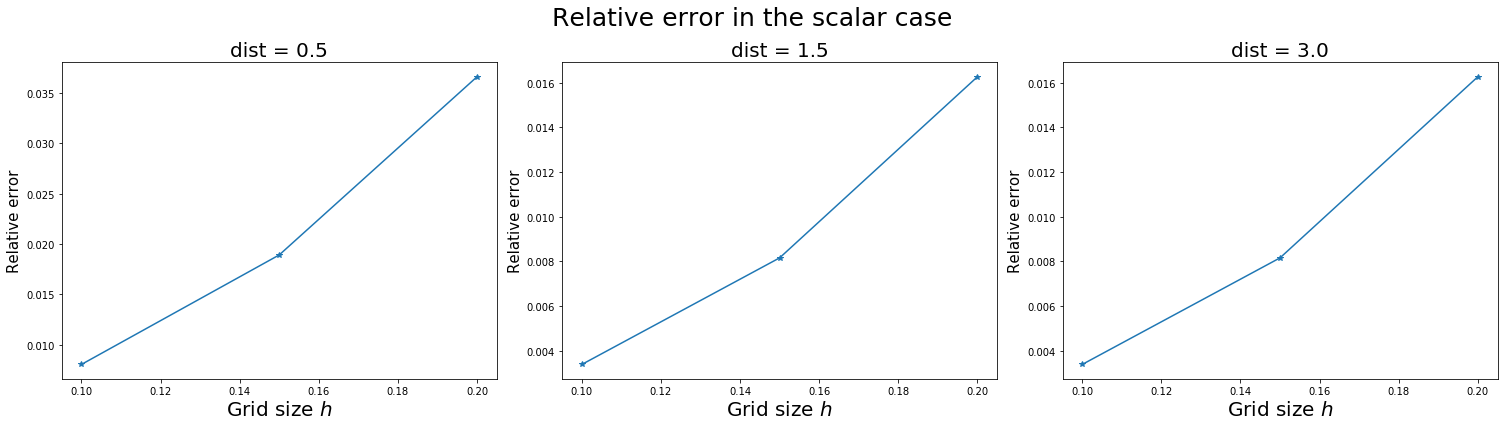

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 6))
ax1.plot([0.1, 0.15, 0.2], Rel_err_05,'*-')
ax1.set_xlabel('Grid size $h$', fontsize = 20)
ax1.set_ylabel('Relative error', fontsize = 15)
ax1.set_title('dist = 0.5', fontsize = 20)

ax2.plot([0.1, 0.15, 0.2], Rel_err_15,'*-')
ax2.set_xlabel('Grid size $h$', fontsize = 20)
ax2.set_ylabel('Relative error', fontsize = 15)
ax2.set_title('dist = 1.5', fontsize = 20)

ax3.plot([0.1, 0.15, 0.2], Rel_err_15,'*-')
ax3.set_xlabel('Grid size $h$', fontsize = 20)
ax3.set_ylabel('Relative error', fontsize = 15)
ax3.set_title('dist = 3.0', fontsize = 20)


fig.tight_layout()
fig.suptitle('Relative error in the scalar case', fontsize = 25)
fig.subplots_adjust(top=0.85)
fig.savefig('CasE_scalar.pdf')